In [1]:
# importing necessory library 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('loan.csv')

In [3]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
data.shape

(614, 13)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
#=======Checking the presence of Null Values=========

#==== We use built in Function isnull() and sum()

data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
data.Gender.unique()



array(['Male', 'Female', nan], dtype=object)

In [8]:
#========filling null values in Column with Numerical Values============

#===========Loading the Required libray
from sklearn.impute import SimpleImputer

In [9]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')


loan_n = data.iloc[:, 8:11]
dependat =data['Dependents']
dependat = dependat.replace('3+', 3)
imputer.fit(loan_n)
loan_data = imputer.transform(loan_n)
loan_d = pd.DataFrame(loan_data)

loan_d

,0,1,2
0,146.412162,360.0,1.0
1,128.000000,360.0,1.0
2,66.000000,360.0,1.0
3,120.000000,360.0,1.0
4,141.000000,360.0,1.0
...,...,...,...
609,71.000000,360.0,1.0
610,40.000000,180.0,1.0
611,253.000000,360.0,1.0
612,187.000000,360.0,1.0


In [10]:
loan_d.isnull().sum()


0    0
1    0
2    0
dtype: int64

# 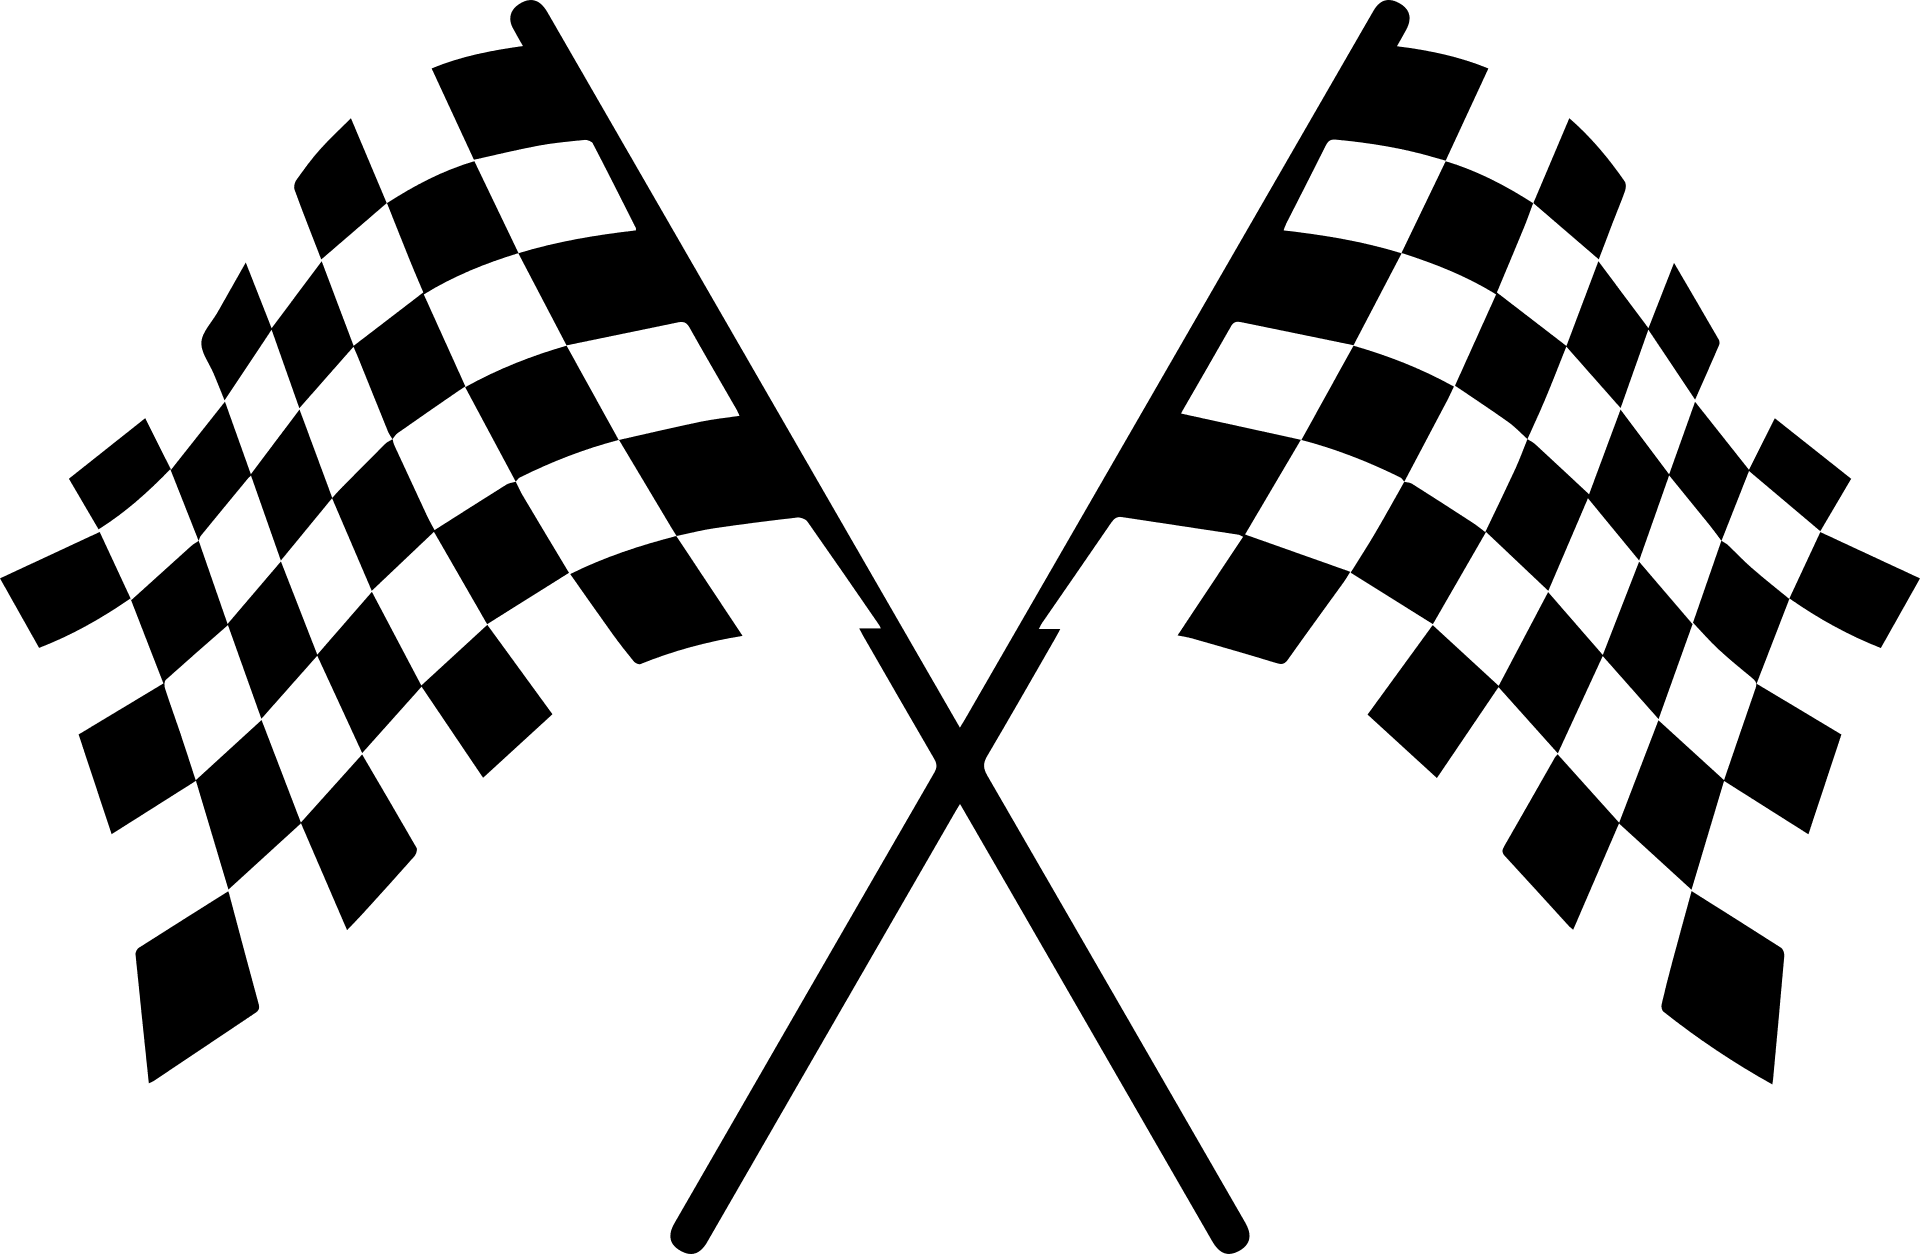

In [11]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [12]:
data['LoanAmount'],data['Loan_Amount_Term'], data['Credit_History'] = loan_d[0], loan_d[1], loan_d[2]

In [13]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [14]:
employ = data['Self_Employed']
P_area = data['Property_Area']
gender = data["Gender"]
status = data["Married"]
education = data["Education"]
loan_status = data['Loan_Status']


status = status.fillna("Yes")
gender = gender.fillna("Male")
P_area= P_area.fillna("Rural")
employ= employ.fillna("Yes")
dependat = dependat.fillna(1)

In [15]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [16]:
data["Gender"]=data["Gender"].fillna("Male")
data["Dependents"]=data["Dependents"].fillna(1)
data['Self_Employed'] = data['Self_Employed'].fillna("Yes")
data["Married"] = data["Married"].fillna("Yes")

In [17]:
data.isnull().sum()
data.head()
data['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [18]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
#========Initializing String to be Encoded==========
encoder = label_encoder.fit_transform(data[["Gender"]])
encoder2 = label_encoder.fit_transform(data[["Married"]])
encoder3 = label_encoder.fit_transform(data[["Education"]])
encoder4 = label_encoder.fit_transform(data[["Self_Employed"]])
encoder5 = label_encoder.fit_transform(data[["Property_Area"]])
encoder6 = label_encoder.fit_transform(data[["Loan_Status"]])



data['Education'],data['Self_Employed'],data['Property_Area'],data["Gender"],data["Married"], data['Loan_Status'], data['Dependents'],data["Loan_Status"]= encoder,encoder2,encoder3,encoder4,encoder5,loan_status,dependat,encoder6
data['Property_Area'].unique()

C:\Users\SujeetBind\anaconda3\envs\BarnesAndNobels\lib\site-packages\sklearn\preprocessing\_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\SujeetBind\anaconda3\envs\BarnesAndNobels\lib\site-packages\sklearn\preprocessing\_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\SujeetBind\anaconda3\envs\BarnesAndNobels\lib\site-packages\sklearn\preprocessing\_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\SujeetBind\anaconda3\envs\BarnesAndNobels\lib\site-packages\sklearn\preprocessing\_label.py:116: DataConve

array([0, 1])

In [19]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0,2,0,1,0,5849,0.0,146.412162,360.0,1.0,0,1
1,LP001003,0,0,1,1,1,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1,2,0,1,1,3000,0.0,66.000000,360.0,1.0,0,1
3,LP001006,0,2,0,1,1,2583,2358.0,120.000000,360.0,1.0,1,1
4,LP001008,0,2,0,1,0,6000,0.0,141.000000,360.0,1.0,0,1


In [20]:
input_data = data.iloc[:,1:-1]
target_data = data.iloc[:,-1:]

In [21]:
input_data.to_csv('input_data.csv')
target_data.to_csv('target_data.csv')

In [22]:
x_train,x_test,y_train,y_test = train_test_split(input_data,target_data,test_size=1/5,random_state=10)

In [23]:
from sklearn.ensemble import RandomForestClassifier

In [24]:
predict = RandomForestClassifier()
model_mcn = predict.fit(x_train,y_train)
pred = model_mcn.predict(x_test)


C:\Users\SujeetBind\AppData\Local\Temp\ipykernel_440\1676093245.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_mcn = predict.fit(x_train,y_train)


In [25]:
pred

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1])

In [26]:
x_test['Property_Area'].unique()

array([0, 1])

In [27]:
y_test

,Loan_Status
285,1
323,1
482,1
173,1
518,0
...,...
554,0
6,1
242,1
192,0


In [28]:
#=========Importing models for classification efficiency
from sklearn.metrics import accuracy_score, classification_report
score_data =accuracy_score(y_test,pred)

In [29]:
score_data

0.8130081300813008

In [30]:

from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(x_train, y_train)
pred = model.predict(x_test)
k = accuracy_score(y_test, pred)


from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(x_train, y_train)
pred = model.predict(x_test)
MB= accuracy_score(y_test, pred)

from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(x_train, y_train)
pred = model.predict(x_test)
GB=accuracy_score(y_test, pred)

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)
pred = model.predict(x_test)
LR=accuracy_score(y_test, pred)

from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(x_train, y_train)
pred = model.predict(x_test)
DTC=  accuracy_score(y_test, pred)

print ("""The result were as Follows\nRandom Forest Classifer {}\n\n K Nearest Neighbors {}
\n\nMultinomial NB {}\n\nGaussian NB {}\n\nLogistic Regression {}\n\n Decision Tree Classifier {}
""".format(score_data,k, MB, GB, LR, DTC))

The result were as Follows
Random Forest Classifer 0.8130081300813008

 K Nearest Neighbors 0.6097560975609756


Multinomial NB 0.5365853658536586

Gaussian NB 0.7804878048780488

Logistic Regression 0.7967479674796748

 Decision Tree Classifier 0.7073170731707317



C:\Users\SujeetBind\anaconda3\envs\BarnesAndNobels\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\SujeetBind\anaconda3\envs\BarnesAndNobels\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\SujeetBind\anaconda3\envs\BarnesAndNobels\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\SujeetBind\anaconda3\envs\BarnesAndNobels\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning:

In [ ]:
from sklearn.externals import joblib